__This chapter will cover:__
    1. What is NaN value
    2. Where do missing data coming from
    3. Working with missing data

# 1. What is NaN value

* NaN is a missing value, different than other types of data
* NaN is not equivalent to anything, neither to 0 nor an empty string because the data is missing

In [1]:
from numpy import NaN, NAN, nan

In [2]:
NaN == 0

False

In [3]:
NaN == ''

False

* Missing values are not equal to other missing values

In [4]:
NaN == NaN

False

In [5]:
NaN == NAN

False

In [6]:
NaN == nan

False

* Pandas methods for dealing with missing values:
    - __pd.isnull()__ is for checking if there is missing value
    - __pd.notnull()__ is for checking if there is no missing value

In [7]:
import pandas as pd

In [8]:
weather = pd.read_csv('C:/Users/User/Desktop/Data Science/6. Pandas for Everyone/data/weather_data.csv')

In [9]:
weather

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,NaN,9.0,Sunny
2,1/5/2017,28.0,NaN,Snow
3,1/6/2017,NaN,7.0,NaN
4,1/7/2017,32.0,NaN,Rain
5,1/8/2017,NaN,NaN,Sunny
6,1/9/2017,NaN,NaN,NaN
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [10]:
# Check data type for day
type(weather.day[0])

str

In [11]:
# Because data type for day is String, we will convert it into date datatype
weather = pd.read_csv('C:/Users/User/Desktop/Data Science/6. Pandas for Everyone/data/weather_data.csv', parse_dates=['day'])

In [12]:
# Check data type for day
type(weather.day[0])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
# Check if there is null in DataFrame
pd.isnull(weather)

,day,temperature,windspeed,event
0,False,False,False,False
1,False,True,False,False
2,False,False,True,False
3,False,True,False,True
4,False,False,True,False
5,False,True,True,False
6,False,True,True,True
7,False,False,False,False
8,False,False,False,False


In [14]:
# Check if there is null in 'windspeed' column
pd.isnull(weather['windspeed'])

0    False
1    False
2     True
3    False
4     True
5     True
6     True
7    False
8    False
Name: windspeed, dtype: bool

In [15]:
# Check if there is not null in row 3 to 5
pd.notnull(weather.loc[3:5])

,day,temperature,windspeed,event
3,True,False,True,False
4,True,True,False,True
5,True,False,False,True


In [16]:
# Check if there is not null on empyty string
pd.notnull('')

True

# 2. Where do missing values coming from

## (a) Load data

In [17]:
# Load visited DataFrame
visited = pd.read_csv('C:/Users/User/Desktop/Data Science/6. Pandas for Everyone/data/survey_visited.csv', parse_dates=['dated'])
visited

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaT
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [18]:
# Load survey DataFrame
survey = pd.read_csv('C:/Users/User/Desktop/Data Science/6. Pandas for Everyone/data/survey_survey.csv')
survey

,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,NaN
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41
5,734,lake,sal,0.05
6,734,pb,temp,NaN
7,735,pb,rad,7.22
8,735,not available,sal,0.06
9,735,not available,temp,-26.00


### i) na_values
na_values is __one of read_csv() parameter__ where we can __replace__ certain string or list-like object into missing value (NaN)

In [19]:
# survey initial data
survey.iloc[8:10]

,taken,person,quant,reading
8,735,not available,sal,0.06
9,735,not available,temp,-26.00


In [20]:
# Change 'not available' into NaN
survey2 = pd.read_csv('C:/Users/User/Desktop/Data Science/6. Pandas for Everyone/data/survey_survey.csv', na_values=['not available'])

In [21]:
survey2.iloc[8:10]

,taken,person,quant,reading
8,735,NaN,sal,0.06
9,735,NaN,temp,-26.00


### ii) keep_default_na

keep_default_na is one of __read_csv() boolean parameter__ where:
- if it is __True__ (default), any missing value will be replaced with NaN
- if it is __False__, any missing value will stay empty

In [22]:
# Set any missing value stay empty
survey3 = pd.read_csv('C:/Users/User/Desktop/Data Science/6. Pandas for Everyone/data/survey_survey.csv', keep_default_na=False)

In [23]:
survey3

,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,
2,622,dyer,rad,7.8
3,622,dyer,sal,0.09
4,734,pb,rad,8.41
5,734,lake,sal,0.05
6,734,pb,temp,
7,735,pb,rad,7.22
8,735,not available,sal,0.06
9,735,not available,temp,-26


### iii) na_filter
* is a bool that will specify whether any values will be read as missing __(running in background)__
* if it is __True__ (default), missing values will be coded as NaN
* if it is __False__ , nothing will be recoded as missing __(better when no missing data)__
    - turn off the parameters set for na_values and keep_default_na
    - improve performance

## (b) Merged data

In [24]:
# Merging the data can result missing values
vs = visited.merge(right=survey2, left_on='ident', right_on='taken')

In [25]:
vs

,ident,site,dated,taken,person,quant,reading
0,619,DR-1,1927-02-08,619,dyer,rad,9.82
1,619,DR-1,1927-02-08,619,dyer,sal,NaN
2,622,DR-1,1927-02-10,622,dyer,rad,7.80
3,622,DR-1,1927-02-10,622,dyer,sal,0.09
4,734,DR-3,1939-01-07,734,pb,rad,8.41
5,734,DR-3,1939-01-07,734,lake,sal,0.05
6,734,DR-3,1939-01-07,734,pb,temp,NaN
7,735,DR-3,1930-01-12,735,pb,rad,7.22
8,735,DR-3,1930-01-12,735,NaN,sal,0.06
9,735,DR-3,1930-01-12,735,NaN,temp,-26.00


## (c) User input values

In [26]:
students = pd.DataFrame({
    'Name':['Priyang','Aadhya','Krisha','Vedant','Parshv','Mittal','Archana'],
    'Marks':[98,nan,99,nan,90,nan,82],
    'Grades':[NAN,'AB','AA',NaN,nan,'BA',NaN]
})

In [27]:
students

,Name,Marks,Grades
0,Priyang,98.0,NaN
1,Aadhya,NaN,AB
2,Krisha,99.0,AA
3,Vedant,NaN,NaN
4,Parshv,90.0,NaN
5,Mittal,NaN,BA
6,Archana,82.0,NaN


## (d) Re-indexing
- When re-indexing, basically adding new rows
- Because new rows, there are no data for them

In [28]:
# Load gapminder DataFrame
gapminder = pd.read_csv('C:/Users/User/Desktop/Data Science/6. Pandas for Everyone/data/gapminder.tsv', sep='\t')

In [29]:
gapminder

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [30]:
# New DataFrame where Year is the index
life_exp = gapminder.groupby(['year'])['lifeExp'].mean()

In [31]:
life_exp

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [32]:
# Take only above year 2000
y2000 = life_exp[life_exp.index>2000]

In [33]:
y2000

year
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [34]:
# Re-indexing (add new rows)
y2000.reindex(range(2000,2010))

year
2000          NaN
2001          NaN
2002    65.694923
2003          NaN
2004          NaN
2005          NaN
2006          NaN
2007    67.007423
2008          NaN
2009          NaN
Name: lifeExp, dtype: float64

# 3. Working with missing data


## (a) Find and count missing data

In [35]:
nft = pd.read_csv('C:/Users/User/Desktop/Data Science/6. Pandas for Everyone/data/nft_tweets.csv')

In [36]:
nft.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Crazino.eth,Singapore,NFT collector,2021-03-14 20:57:40+00:00,75,472,664,False,2021-11-14 15:54:50+00:00,@Kwebbelkop @Hor1zon_Project #NFT #NFTs #BlueC...,"['NFT', 'NFTs', 'BlueChipNFT']",Twitter Web App,False
1,NFT Drops,NaN,Mint 50 NFTs in an #Ethereum block to appear h...,2021-08-09 12:06:48+00:00,151,1,2,False,2021-11-14 15:54:48+00:00,🔥🔥🔥 HOT #NFT DROP ALERT 🔥🔥🔥 \n\n5 mints for NF...,['NFT'],jpgdrops,False
2,Laercio Macho,NaN,Paz amor e alegria vivo um dia por vez o amanh...,2021-08-03 17:57:09+00:00,59,1435,1047,False,2021-11-14 15:54:48+00:00,@GuildFiGlobal I AM HAPPY TO PARTICIPATE \n@se...,NaN,Twitter Web App,False
3,Jillmarkin,NaN,NaN,2014-03-27 18:21:20+00:00,816,124,101948,False,2021-11-14 15:54:48+00:00,@cowesion The metamask experience #xecturkey #...,"['xecturkey', 'XEC', 'NFT']",Twitter for Android,False
4,huck wirtz,NaN,"Digital artist, senior animator at ILMxlab",2021-03-18 22:22:43+00:00,3301,3871,17248,False,2021-11-14 15:54:47+00:00,🔥⚔️⚔️🐮⚔️⚔️🔥 Part of the lands of Mootopia #nft...,"['nft', 'rpg', 'cardgame', 'nft', 'rpg']",Twitter for iPhone,False


In [37]:
# Use count() function to see non-missing values in every column
nft.count()

user_name           12451
user_location        6007
user_description    10832
user_created        12452
user_followers      12452
user_friends        12452
user_favourites     12452
user_verified       12452
date                12452
text                12452
hashtags             7728
source              12452
is_retweet          12452
dtype: int64

In [38]:
# Find how many missing values in every column
total_rows = nft.shape[0]
missing = total_rows - nft.count()

In [39]:
missing

user_name              1
user_location       6445
user_description    1620
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            4724
source                 0
is_retweet             0
dtype: int64

In [40]:
import numpy as np

In [41]:
# Count total number of missing values

In [42]:
# 1. Set null values to True to eliminate non-missing values (False)
nft.isnull().head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,True,False,False
3,False,True,True,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False


In [43]:
# 2. To count total non-zero values in DataFrame
np.count_nonzero(nft)

136196

In [44]:
# 3. When combine, count_nonzero() will count only True from nft.isnull(), which means the null values
np.count_nonzero(nft.isnull())

12790

In [45]:
# 4. If you want to count missing values on specific column
np.count_nonzero(nft['hashtags'].isnull())

4724

In [46]:
# value_counts() function is to count the frequency of data
# dropna=False means count missing values also
nft.hashtags.value_counts(dropna=False)

NaN                                                                       4724
['NFT']                                                                   1384
['nft']                                                                    197
['Velhalla']                                                               177
['DragonballInu', 'NFT']                                                   104
                                                                          ... 
['capp', 'cappasity', 'Metaverse', 'kucoin', 'ecommercewebsite', 'ar']       1
['NFT', 'catecoin', 'CateArmy', 'BSC', 'Altcoins']                           1
['axs', 'ron', 'nft', 'btcenter']                                            1
['zil', 'zilliqa', 'zilaverse', 'nft', 'art']                                1
['BabyDoge', 'NFT', 'BabyDogeCoin']                                          1
Name: hashtags, Length: 2927, dtype: int64

## (b) Cleaning missing data

### (i) Recode / Replace
using fillna() to replace missing values

In [47]:
# When we want to replace NaN with specific values based on columns
nft.fillna({
    'user_name':'Anonymous',
    'user_location':'Unknown',
    'user_description':'None',
    'hashtags':'None'
}).head(10)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Crazino.eth,Singapore,NFT collector,2021-03-14 20:57:40+00:00,75,472,664,False,2021-11-14 15:54:50+00:00,@Kwebbelkop @Hor1zon_Project #NFT #NFTs #BlueC...,"['NFT', 'NFTs', 'BlueChipNFT']",Twitter Web App,False
1,NFT Drops,Unknown,Mint 50 NFTs in an #Ethereum block to appear h...,2021-08-09 12:06:48+00:00,151,1,2,False,2021-11-14 15:54:48+00:00,🔥🔥🔥 HOT #NFT DROP ALERT 🔥🔥🔥 \n\n5 mints for NF...,['NFT'],jpgdrops,False
2,Laercio Macho,Unknown,Paz amor e alegria vivo um dia por vez o amanh...,2021-08-03 17:57:09+00:00,59,1435,1047,False,2021-11-14 15:54:48+00:00,@GuildFiGlobal I AM HAPPY TO PARTICIPATE \n@se...,None,Twitter Web App,False
3,Jillmarkin,Unknown,None,2014-03-27 18:21:20+00:00,816,124,101948,False,2021-11-14 15:54:48+00:00,@cowesion The metamask experience #xecturkey #...,"['xecturkey', 'XEC', 'NFT']",Twitter for Android,False
4,huck wirtz,Unknown,"Digital artist, senior animator at ILMxlab",2021-03-18 22:22:43+00:00,3301,3871,17248,False,2021-11-14 15:54:47+00:00,🔥⚔️⚔️🐮⚔️⚔️🔥 Part of the lands of Mootopia #nft...,"['nft', 'rpg', 'cardgame', 'nft', 'rpg']",Twitter for iPhone,False
5,NFT Drops,Unknown,Mint 50 NFTs in an #Ethereum block to appear h...,2021-08-09 12:06:48+00:00,151,1,2,False,2021-11-14 15:54:47+00:00,🔥🔥🔥 HOT #NFT DROP ALERT 🔥🔥🔥 \n\n10 mints for N...,['NFT'],jpgdrops,False
6,Nika Che,Донецк,#objekt #opensea #nft #tezos #polygon ...,2011-12-08 11:24:26+00:00,738,854,12682,False,2021-11-14 15:54:47+00:00,@nftspacewalker Freedom farm\n\nauction\n\n#hi...,"['hicnft', 'hic', 'tezos', 'teznft', 'hicetnun...",Twitter for Android,False
7,Hex | DSNR,Designer’s HQ,"#DSNR #solana #shibarmy #nootnoot\n\n10,000 of...",2021-11-03 14:53:59+00:00,87,197,77,False,2021-11-14 15:54:46+00:00,Check our latest work! @designer_punks is lit!...,None,Twitter Web App,False
8,sahinkocart,Berlin Germany,"sahin koc, musician and NFT artist\n\nLatest S...",2021-02-20 18:24:37+00:00,203,201,291,False,2021-11-14 15:54:46+00:00,check out my new NFT collection :)\n\nhttps://...,"['nft', 'nfts', 'NFTCommunity', 'nftcollector'...",Twitter Web App,False
9,Quinten.Akerboom,The Netherlands,"#Techno producer and DJ, #NFT artist and colle...",2021-10-03 15:55:04+00:00,192,250,981,False,2021-11-14 15:54:45+00:00,I can't stop looking at this neat #NFT made by...,['NFT'],Twitter Web App,False


In [48]:
ebola = pd.read_csv('C:/Users/User/Desktop/Data Science/6. Pandas for Everyone/data/country_timeseries.csv')

In [49]:
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [50]:
# When we want to replace missing values with same data entire DataFrame
ebola.fillna(0).head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,0.0,10030.0,0.0,0.0,0.0,0.0,0.0,1786.0,0.0,2977.0,0.0,0.0,0.0,0.0,0.0
1,1/4/2015,288,2775.0,0.0,9780.0,0.0,0.0,0.0,0.0,0.0,1781.0,0.0,2943.0,0.0,0.0,0.0,0.0,0.0
2,1/3/2015,287,2769.0,8166.0,9722.0,0.0,0.0,0.0,0.0,0.0,1767.0,3496.0,2915.0,0.0,0.0,0.0,0.0,0.0
3,1/2/2015,286,0.0,8157.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3496.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12/31/2014,284,2730.0,8115.0,9633.0,0.0,0.0,0.0,0.0,0.0,1739.0,3471.0,2827.0,0.0,0.0,0.0,0.0,0.0


### (ii) Forward fill
- forward fill is fill missing values based on its above rows data 

In [51]:
# Before applying forward fill
weather

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
3,2017-01-06,NaN,7.0,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,NaN,NaN,NaN
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


In [52]:
# After applying forward fill
weather.fillna(method='ffill')

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,32.0,9.0,Sunny
2,2017-01-05,28.0,9.0,Snow
3,2017-01-06,28.0,7.0,Snow
4,2017-01-07,32.0,7.0,Rain
5,2017-01-08,32.0,7.0,Sunny
6,2017-01-09,32.0,7.0,Sunny
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


### (iii) Backward fill
- backward fill is fill missing values based on its below rows data 

In [53]:
# After applying forward fill
weather.fillna(method='bfill')

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,28.0,9.0,Sunny
2,2017-01-05,28.0,7.0,Snow
3,2017-01-06,32.0,7.0,Rain
4,2017-01-07,32.0,8.0,Rain
5,2017-01-08,34.0,8.0,Sunny
6,2017-01-09,34.0,8.0,Cloudy
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


### (iv) Limit
- limit set maximum number of consecutive NaN values to forward/backward fill

In [54]:
weather.fillna(method='ffill', limit=1)

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,32.0,9.0,Sunny
2,2017-01-05,28.0,9.0,Snow
3,2017-01-06,28.0,7.0,Snow
4,2017-01-07,32.0,7.0,Rain
5,2017-01-08,32.0,NaN,Sunny
6,2017-01-09,NaN,NaN,Sunny
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


### (v) Interpolate
- For better guessing the missing values
- Have to learn interpolation to understand this

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
weather_before = weather.copy()

In [57]:
# Set day as index
weather_before.set_index('day', inplace=True)

In [58]:
weather_before

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [59]:
# Apply interpolation method 'time'
weather_after = weather_before.interpolate(method='time')

In [60]:
weather_after

,temperature,windspeed,event
day,,,
2017-01-01,32.000000,6.00,Rain
2017-01-04,29.000000,9.00,Sunny
2017-01-05,28.000000,8.00,Snow
2017-01-06,30.000000,7.00,NaN
2017-01-07,32.000000,7.25,Rain
2017-01-08,32.666667,7.50,Sunny
2017-01-09,33.333333,7.75,NaN
2017-01-10,34.000000,8.00,Cloudy
2017-01-11,40.000000,12.00,Sunny


In [61]:
# Reset index
weather_before.reset_index(inplace=True)
weather_after.reset_index(inplace=True)

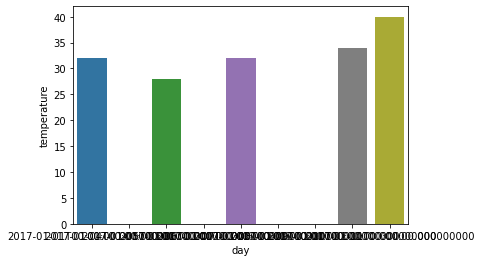

In [62]:
# Plot bar plot for weather before interpolation using seaborn
hist, ax = plt.subplots()
ax = sns.barplot(x='day',y='temperature', data=weather_before)
plt.show()

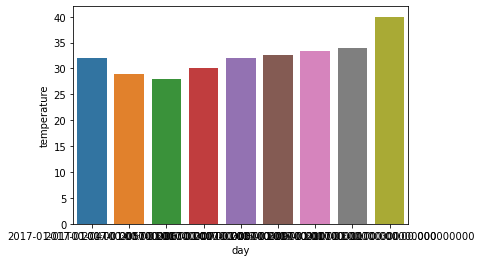

In [63]:
# Plot bar plot for weather after interpolation using seaborn
hist, ax = plt.subplots()
ax = sns.barplot(x='day',y='temperature', data=weather_after)
plt.show()

### (vi) Drop missing values

In [64]:
# Remove rows that has any missing values
vs_dropna = vs.dropna()

In [65]:
vs_dropna

,ident,site,dated,taken,person,quant,reading
0,619,DR-1,1927-02-08,619,dyer,rad,9.82
2,622,DR-1,1927-02-10,622,dyer,rad,7.80
3,622,DR-1,1927-02-10,622,dyer,sal,0.09
4,734,DR-3,1939-01-07,734,pb,rad,8.41
5,734,DR-3,1939-01-07,734,lake,sal,0.05
7,735,DR-3,1930-01-12,735,pb,rad,7.22
10,751,DR-3,1930-02-26,751,pb,rad,4.35
11,751,DR-3,1930-02-26,751,pb,temp,-18.50
12,751,DR-3,1930-02-26,751,lake,sal,0.10
17,837,MSK-4,1932-01-14,837,lake,rad,1.46


## (c) Calculation with missing data

In [66]:
# Create new ebola DataFrame
ebola_new = ebola.copy()

In [67]:
ebola_new.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [68]:
# New column for total cases
ebola_new['Total_Cases'] = ebola_new['Cases_Guinea'] + ebola_new['Cases_Liberia'] + ebola_new['Cases_SierraLeone'] + ebola_new['Cases_Nigeria'] + ebola_new['Cases_Senegal'] + ebola_new['Cases_UnitedStates'] + ebola_new['Cases_Spain'] + ebola_new['Cases_Mali']

In [69]:
ebola_new.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,Total_Cases
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# Subset ebola DataFrame (Cases)
ebola_cases_subset = ebola_new.loc[:,['Cases_Guinea','Cases_Liberia','Cases_SierraLeone','Cases_Nigeria','Cases_Senegal','Cases_UnitedStates','Cases_Spain','Cases_Mali','Total_Cases']]

In [71]:
# Data + NaN = NaN
ebola_cases_subset

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Total_Cases
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
117,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
118,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
# How to get total number of cases
ebola_cases_subset['Total_Cases'].sum(skipna=True)

15351.0

# Exercise

## 1. Total number of deaths in ebola DataFrame

In [73]:
# Create ebola exercise DataFrame
ebola_ex = ebola.copy()

In [74]:
ebola_ex

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
# Check data type for Date
type(ebola_ex['Date'][0])

str

In [76]:
# Because Date is str, we have to convert into DateTime
ebola_ex['Date'] = pd.to_datetime(ebola_ex['Date'], format='%m/%d/%Y')

In [77]:
ebola_ex.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [78]:
# Sort DataFrame by Date
ebola_ex_sort = ebola_ex.sort_values(by='Date', ignore_index=True)

In [79]:
# Fill NaN into 0
ebola_ex_sort.fillna(0, inplace=True)

In [80]:
ebola_ex_sort.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2014-03-22,0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014-03-24,2,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2014-03-25,3,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014-03-26,4,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014-03-27,5,103.0,8.0,6.0,0.0,0.0,0.0,0.0,0.0,66.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0


In [81]:
# Create ebola deaths subset data
ebola_deaths_subset = ebola_ex_sort.loc[:,['Deaths_Guinea','Deaths_Liberia','Deaths_SierraLeone','Deaths_Nigeria','Deaths_Senegal','Deaths_UnitedStates','Deaths_Spain','Deaths_Mali']]

In [82]:
ebola_deaths_subset.head()

,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,66.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0


In [83]:
# Calculate total number of deaths for every row
ebola_deaths_subset['Total'] = ebola_deaths_subset[['Deaths_Guinea','Deaths_Liberia','Deaths_SierraLeone','Deaths_Nigeria','Deaths_Senegal','Deaths_UnitedStates','Deaths_Spain','Deaths_Mali']].sum(axis=1)

In [84]:
ebola_deaths_subset.head()

,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,Total
0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0
1,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0
2,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
3,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0
4,66.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,77.0
